### TODO:
1. Find optimal number of clusters:  
Entoropy measure from 6-034??  
Try increasing performance using semi-supervised techniques.

2. Try reducing dimenionality: remove unnecessary words. 
3. Build model into a pipeline, integrate CV search for optimal results??
4. Use ensemble learning??

In [1]:
print('imports and options')
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# pd.set_option('display.max_colwidth',20) #change this to increse width cutoff limit
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)

plt.rcParams['figure.figsize'] = [5,5]#[20, 10]
# plt.rcParams['axes.facecolor'] = 'black'

imports and options


In [2]:
print('Load file')
by_good = pd.read_excel('by_name.xls',skiprows=list(range(8)),header = 0,na_values=[' ']).fillna(0)
by_good = by_good.drop(columns = ['Unnamed: 1','Unnamed: 2'])
by_good = by_good.rename(columns={'Unnamed: 0':'name','единица':'amt',
                                  'Сумма':'in','Сумма.1':'Out','Процент':'Prof %','Сумма.2':'Profit'})

Load file


In [3]:
print('Deal with anomalies')
drop = [0,3261] 
# # Profit <=0
drop += [769, 1082, 113, 332, 333, 1531, 2133, 2401, 799, 1804, 1519, 778, 1338, 2391, 1518, 1568, 2567, 707, 787, 385, 1344, 2665,
         454, 2717, 2755, 2543, 3236, 85, 2561, 132, 2803, 3254, 1828, 97, 337, 1609, 2552, 2500, 3211, 1984, 84, 1968, 2790, 875, 
         1021, 2489, 1469, 1900, 2437, 2503, 2856, 2431, 2537, 2737, 2950, 2928, 1118, 2559, 719, 33, 2930, 2929, 2323, 26, 2013, 
         1965, 1812, 54, 68, 2859, 3227, 1450, 80, 703, 602, 1253, 1437, 771, 2353, 53, 1898, 3248, 2130, 953, 768, 1705, 143, 1934, 
         1292, 206, 1107, 877, 293, 1037, 977]
# Unreal profit
drop+= [3170, 821, 90, 730, 1682, 1538, 1539, 1541, 2122, 62, 2299, 694, 819, 4, 1, 2,1485]

by_good.loc[sorted(drop),:]

df = by_good.drop(drop)
df = df.drop(columns = ['in','Out'])
df = df.reset_index(drop=True)


Deal with anomalies


In [4]:
print('Feature extraction and pipeline')
'''
Try differents scaling approach
CountVectorizer parameters??
Stop words??
feature selection: nums?, 
'''
# profit per unit
df['PPU'] = df['Profit']/df['amt'] 

# pipeline
from sklearn.compose import ColumnTransformer

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


nums = ['amt','Profit','PPU']
nums = ['amt','PPU']

column = ColumnTransformer([
    ('freq_terms',CountVectorizer(),'name'),
#     ('std',StandardScaler(),nums),
#     ('robust',RobustScaler(),nums),

])

# Features: 
X = column.fit_transform(df)

Feature extraction and pipeline


PCA and and unsupervised model experimantation


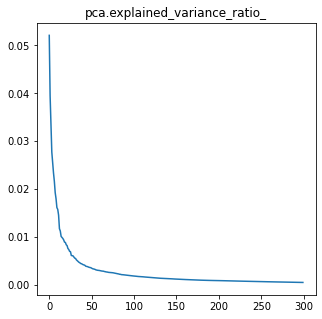

In [5]:
print('PCA and and unsupervised model experimantation')

from sklearn.decomposition import PCA

pca = PCA(n_components = 300)
X_reduced = pca.fit_transform(X.toarray())
evr = pca.explained_variance_ratio_

plt.figure()
plt.title('pca.explained_variance_ratio_')
plt.plot(evr)
plt.show()


'''models tried'''
from sklearn.mixture import BayesianGaussianMixture 
from sklearn import cluster as cl

model = BayesianGaussianMixture(n_components=5,n_init=10) # O(kmn^2+ kn^3) -> slow;  
# model = cl.AffinityPropagation() #did not converge
# model = cl.SpectralClustering(n_clusters=15) # number of distinct clusters (2) found smaller than n_clusters (15). Possibly due to duplicate points in X.

df['test_cat'] = model.fit_predict(X_reduced)

In [8]:
print('K-means')
'''
try:
agglomerative,
affinity-prop
spectral
mean-shift

'''

from sklearn.cluster import KMeans 

model = KMeans(n_clusters=5,random_state=8934) # poor accuracy, need to find optimal number of clusters


model.fit_transform(X)
df['cat'] = model.labels_
df.head()

K-means


,name,amt,Prof %,Profit,PPU,test_cat,cat
0,20 Знак нагрудный (№ 9),5.0,100.00,50.0,10.0,2,0
1,200 Отл. караул. зн нагруд. № 7,1.0,117.39,27.0,27.0,1,0
2,46/176 К-м ВКБО,4.0,100.00,5600.0,1400.0,4,2
3,48/170 К-м ВКБО,2.0,100.00,2800.0,1400.0,4,2
4,48/176 К-м ВКБО,3.0,100.00,4200.0,1400.0,4,2


plotting


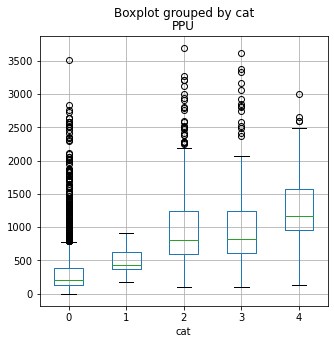

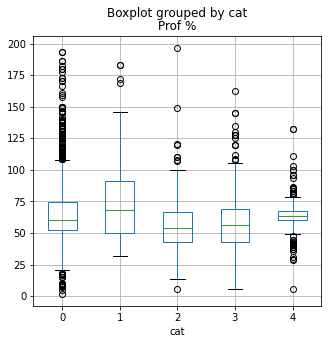

In [9]:
print("plotting")
'''
Use figures to plot in a row
'''

df.boxplot('PPU','cat',)

df.boxplot('Prof %','cat')

# df.boxplot('amt','cat')

In [10]:
print('Stats by category')
'''TODO:
Plotting by category
'''
# pd.set_option('display.max_rows', df.shape[0]+1)


for i in sorted(df['cat'].unique()):
    frame = df[df['cat']==i]
    print(str(i).center(100))
    print(frame)
#     frame.drop(columns=['name']).plot(title=i)

Stats by category
                                                 0                                                  
                                  name    amt  Prof %  Profit          PPU  test_cat  cat
0              20 Знак нагрудный (№ 9)    5.0  100.00    50.0    10.000000         2    0
1     200 Отл. караул. зн  нагруд. № 7    1.0  117.39    27.0    27.000000         1    0
6                 50/170 К-м ВКБО ст/о    4.0  100.00  5600.0  1400.000000         2    0
8                      50/182 К-м ВКБО    1.0  100.00  1400.0  1400.000000         4    0
9                      52/170 К-м ВКБО    1.0  100.00  1400.0  1400.000000         4    0
...                                ...    ...     ...     ...          ...       ...  ...
3143                       Эмблема п/а  256.0   80.28  3420.0    13.359375         2    0
3144           Эмблема УФСИН п/а черн.  100.0   99.88  1997.6    19.976000         2    0
3145                       Якорь 24 мм    8.0  114.29    64.0     8.000

In [ ]:
df[df['cat']==0]

In [ ]:
print('Interactive plot, bokeh')
"""
NOTES:
Colors don't work!!

"""
from bokeh.plotting import figure, show
import bokeh.plotting as bpl
import bokeh.models as bmo
from bokeh.palettes import d3
from bokeh.models.tools import HoverTool

source = bpl.ColumnDataSource(df)
hover = HoverTool(tooltips = [('name','@name'),('PPU','@PPU'),('amt','@amt') ])
p = figure(width=1800,height = 1000,tools=[hover])

# use whatever palette you want...
# palette = d3['Category10'][len(df['cat'].unique())]
# color_map = bmo.CategoricalColorMapper(factors = df['cat'].unique().astype('U'),palette=palette)

# create figure and plot
p.scatter('cat','PPU',
#           color={'field': 'cat', 'transform': color_map},
          source=source)

# bpl.show(p) 